<a href="https://colab.research.google.com/github/immabridget/Timeseries-models/blob/main/SARIMAX_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#get the data
data = pd.read_csv("Data.csv", 
                   index_col = "Date", 
                   parse_dates = True)
data.head(1)

,Amount
Date,
2020-01-02,0.002


#Data Transformation

In [ ]:
#index
data = data.asfreq("D")
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', name='Date', length=139, freq='D')

#Visualization

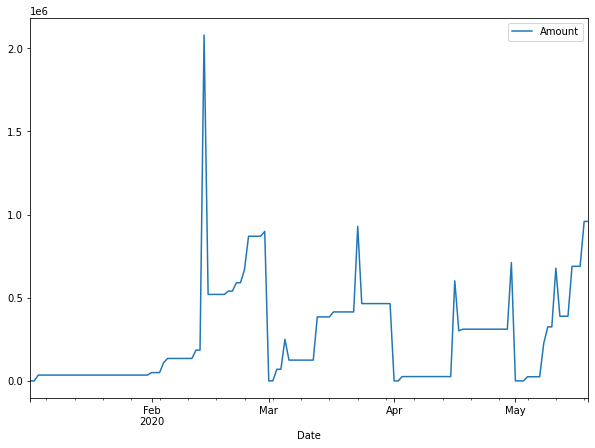

In [ ]:
#viz
data["Amount"].plot(figsize = (10, 7), legend = True)

#Stationarity

#Training and Test Set

In [ ]:
#Training and test set
test_days = 30
training_set = data.iloc[:-test_days, :]
test_set = data.iloc[-test_days:, :]
test_set.tail(1)

,Amount
Date,
2020-05-19,959000.012


#Autoarima

In [ ]:
#Libraries
from pmdarima import auto_arima

In [ ]:
#forecasting model
model = auto_arima(y = training_set['Amount'],
            
                   m = 7,
                   seasonal = True,
                   stepwise = False)

In [ ]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  109
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1503.226
Date:                Fri, 13 Jan 2023   AIC                           3014.452
Time:                        07:50:34   BIC                           3025.217
Sample:                    01-02-2020   HQIC                          3018.818
                         - 04-19-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.583e+04    3.4e+04      2.227      0.026    9097.963    1.43e+05
ar.L1          0.4296      0.056      7.699      0.000       0.320       0.539
ar.L2          0.2632      0.072      3.677      0.000       0.123       0.403
sigma2      5.605e+10      0.561      1e+11      0.000     5.6e+10     5.6e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              6119.51
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.26   Skew:                             4.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+25. Standard errors may be unstable.
"""

In [ ]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                               )).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

Date
2020-04-20    291285.035724
2020-04-21    282814.704764
2020-04-22    273987.436040
2020-04-23    267965.890308
2020-04-24    263055.863869
2020-04-25    259361.727843
2020-04-26    256482.487227
2020-04-27    254273.324497
2020-04-28    252566.496801
2020-04-29    251251.825858
2020-04-30    250237.832495
2020-05-01    249456.219776
2020-05-02    248853.571514
2020-05-03    248388.965383
2020-05-04    248030.762844
2020-05-05    247754.601852
2020-05-06    247541.689696
2020-05-07    247377.541312
2020-05-08    247250.987965
2020-05-09    247153.419319
2020-05-10    247078.196936
2020-05-11    247020.202834
2020-05-12    246975.491195
2020-05-13    246941.019920
2020-05-14    246914.443645
2020-05-15    246893.954169
2020-05-16    246878.157423
2020-05-17    246865.978626
2020-05-18    246856.589155
2020-05-19    246849.350166
Freq: D, Name: SARIMAX, dtype: float64

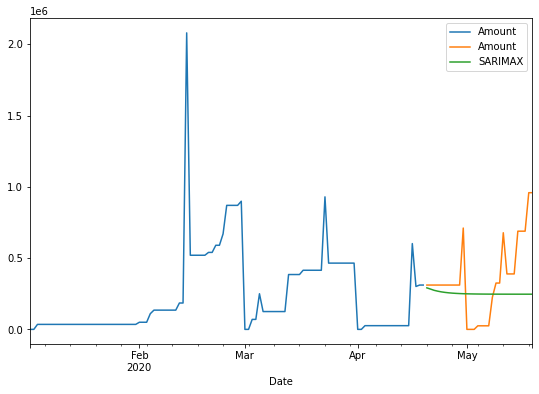

In [ ]:
#visualization
training_set['Amount'].plot(figsize = (9,6), legend = True)
test_set['Amount'].plot(legend = True)
predictions_sarimax.plot(legend = True)

#Model assessment

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['Amount'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['Amount'], predictions_sarimax)), 0))

211365.0
287441.0


# SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
SARIMAXmodel = SARIMAX(training_set, order = (1, 1, 1), seasonal_order=(1,1,1,7))
SARIMAXmodel = SARIMAXmodel.fit()



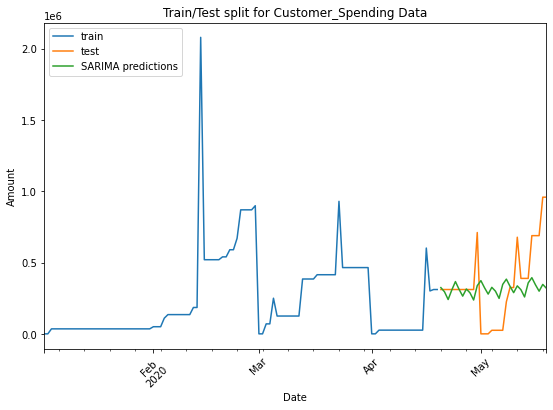

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = SARIMAXmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 
plt.figure(figsize=(10,5))
#visualization
training_set['Amount'].plot(figsize = (9,6), legend = True)
test_set['Amount'].plot(legend = True)
y_pred_out.plot(legend = True)
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Customer_Spending Data")
plt.legend(['train','test','SARIMA predictions'],
            loc='upper left')

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['Amount'],y_pred_out),0))
print(round(np.sqrt(mean_squared_error(test_set['Amount'], y_pred_out)), 0))

194784.0
264928.0


#export forecasts

In [ ]:
predictions_sarimax.to_csv('predictions_sarimax.csv', index = True)